In [147]:
import pandas as pd
import matplotlib.pyplot as plt
oo = pd.read_csv('Ex_Files_Pandas_EssT/ExerciseFiles/data/olympics.csv', skiprows=4)

# Task L10.2

На какой дистанции Jesse Owens выиграл медаль?

In [1025]:
oo[(oo.Athlete == 'OWENS, Jesse')]['Event']

6427            100m
6439            200m
6456    4x100m relay
6523       long jump
Name: Event, dtype: object

Какая страна выиграла большинство золотых медалей мужчинами в
бадминтоне? Отсортировать результат в алфавитном порядке по имени
игрока.

In [1033]:
oob = oo[(oo.Sport == 'Badminton') & (oo.Gender == 'Men')]
max_medals = max(oob.NOC.value_counts())
max_noc = [noc for noc in oob.NOC if len(oob[oob.NOC == noc]) == max_medals][0]
oob[(oob.NOC == max_noc)].sort_values(by='Athlete')

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
20045,Barcelona,1992,Badminton,Badminton,"BUDI KUSUMA, Alan",INA,Men,singles,M,Gold
20033,Barcelona,1992,Badminton,Badminton,"GUNAWAN, Rudy",INA,Men,doubles,M,Silver
23701,Sydney,2000,Badminton,Badminton,"GUNAWAN, Tony",INA,Men,doubles,M,Gold
20034,Barcelona,1992,Badminton,Badminton,"HARTONO, Eddy",INA,Men,doubles,M,Silver
23718,Sydney,2000,Badminton,Badminton,HENDRAWAN,INA,Men,singles,M,Silver
25715,Athens,2004,Badminton,Badminton,"HIAN, Eng",INA,Men,doubles,M,Bronze
25734,Athens,2004,Badminton,Badminton,"HIDAYAT, Taufik",INA,Men,singles,M,Gold
21768,Atlanta,1996,Badminton,Badminton,"IRIANTO, Antonius",INA,Men,doubles,M,Bronze
21769,Atlanta,1996,Badminton,Badminton,"KANTONO, Denny",INA,Men,doubles,M,Bronze
27725,Beijing,2008,Badminton,Badminton,"KIDO, Markis",INA,Men,doubles,M,Gold


Какие три страны выиграли большинство медалей в последние годы (с 1984 по 2008)?

In [224]:
oo[(oo.Edition >= 1984)].NOC.value_counts().head(3)

USA    1837
AUS     762
GER     691
Name: NOC, dtype: int64

Покажите мужчин золотых медалистов по 100m. Выведите результаты по убыванию года выйгрыша. Покажите город в котором проходила олимпиала, год, имя атлета и страну за которую он выступал.

In [77]:
oo_gold_men_100m = oo[(oo.Medal == 'Gold') & (oo.Gender == 'Men') & (oo.Event == '100m')].sort_values(ascending=False, by='Edition')

In [79]:
oo_gold_men_100m[['City', 'Edition', 'Athlete', 'NOC']]

,City,Edition,Athlete,NOC
27552,Beijing,2008,"BOLT, Usain",JAM
25539,Athens,2004,"GATLIN, Justin",USA
23521,Sydney,2000,"GREENE, Maurice",USA
21598,Atlanta,1996,"BAILEY, Donovan",CAN
19859,Barcelona,1992,"CHRISTIE, Linford",GBR
18284,Seoul,1988,"LEWIS, Carl",USA
16794,Los Angeles,1984,"LEWIS, Carl",USA
15374,Moscow,1980,"WELLS, Allan",GBR
14069,Montreal,1976,"CRAWFORD, Hasely",TRI
12902,Munich,1972,"BORZOV, Valery",URS


# Task L10.3

Используя groupby(), постройте график число всех медалей выйгранных на каждой олимпиаде.

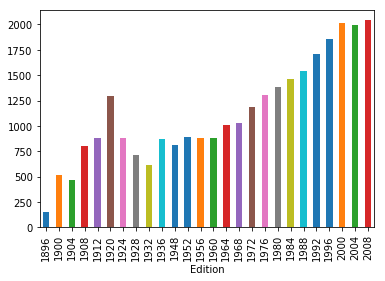

In [172]:
oo.groupby(['Edition']).size().plot(kind='bar')

Создайте список показывающий число всех медалей выигранных каждой страной в течение всей истории олимпийских игр. Для каждой страны, необходимо показать год первой и последней заработанной медали.

In [146]:
oo.groupby(['NOC']).agg({'Edition' : ['count', 'min', 'max']})

Edition            
      count   min   max
NOC                    
AFG       1  2008  2008
AHO       1  1988  1988
ALG      14  1984  2008
ANZ      29  1908  1912
ARG     239  1924  2008
ARM       9  1996  2008
AUS    1075  1896  2008
AUT     146  1896  2008
AZE      16  1996  2008
BAH      23  1956  2008
BAR       1  2000  2000
BDI       1  1996  1996
BEL     408  1900  2008
BER       1  1976  1976
BLR      92  1996  2008
BOH       7  1900  1908
BRA     372  1920  2008
BUL     331  1952  2008
BWI       5  1960  1960
CAN     592  1900  2008
CHI      33  1928  2008
CHN     679  1984  2008
CIV       1  1984  1984
CMR      22  1968  2008
COL      11  1972  2008
CRC       4  1988  2000
CRO      79  1992  2008
CUB     395  1900  2008
CZE      41  1996  2008
DEN     491  1896  2008
..      ...   ...   ...
SRI       2  1948  2000
SUD       1  2008  2008
SUI     376  1896  2008
SUR       2  1988  1992
SVK      29  1996  2008
SWE    1021  1900  2008
SYR       3  1984  2004
TAN       2  1980  1980
TCH     329  1920  1992
TGA       1  1996  1996
THA      21  1976  2008
TJK       2  2008  2008
TOG       1  2008  2008
TPE      42  1960  2008
TRI      20  1948  2008
TUN       7  1964  2008
TUR      82  1936  2008
UAE       1  2004  2004
UGA       6  1968  1996
UKR     148  1996  2008
URS    2049  1952  1988
URU      76  1924  2000
USA    4335  1896  2008
UZB      17  1996  2008
VEN      11  1952  2008
VIE       2  2000  2008
YUG     435  1924  2000
ZAM       2  1984  1996
ZIM      23  1980  2008
ZZX      48  1896  1904

[138 rows x 3 columns]

# Task L10.4

Постройте график числа золотых медалей выйгранных США мужчинами и женщинами в атлетике.

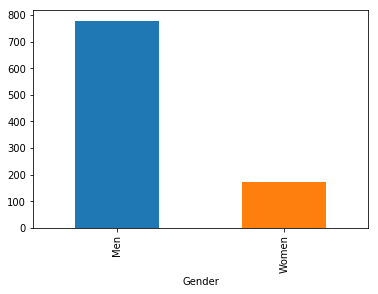

In [180]:
oo[(oo.NOC == 'USA') & (oo.Discipline == 'Athletics')].groupby('Gender').size().plot(kind='bar')

На всякий случай еще по годам.

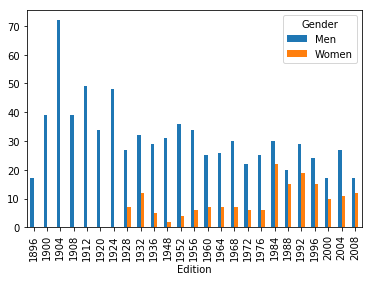

In [1035]:
usa_athletics = oo[(oo.NOC == 'USA') & (oo.Discipline == 'Athletics')]
usa_genders = usa_athletics.groupby(['Edition', 'Gender']).size()
usa_genders.unstack('Gender').plot(kind='bar')

Постройте график 5 атлетов которые выйграли большинство золотых медалей.

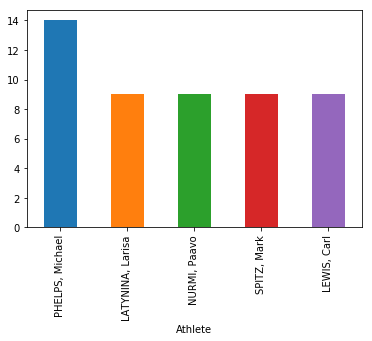

In [230]:
oo[oo.Medal == 'Gold'].groupby('Athlete').size().sort_values(ascending=False).head(5).plot(kind='bar')

# HW L10.1

Сначала составим таблицу с количеством медалей, выигранных каждым атлетом с группировкой по году (medals_per_edition), а так же максимальное количество медалей в каждый год (max_medals_per_edition):

In [1030]:
oo_usa = oo[(oo.NOC == 'USA')]
medals_per_edition = oo_usa.groupby(['Edition', 'Athlete']).agg({'Medal' : 'count'})
max_medals_per_edition = medals_per_edition.groupby('Edition').agg({'Medal' : 'max'})

Вместо таблицы medals_per_edition будем пользоваться словарем dict_edition_athlete, который содержит, по сути, те же самые данные, но в более удобной форме. Так же определим дополнительные функции get_medals и get_discipline, которые вычисляют количество медалей определенного типа, выигранных атлетом в данный год и диспциплину атлета в этот год (если таких дисциплин несколько, то берется первая в списке). 

In [1031]:
dict_edition_athlete = dict(medals_per_edition['Medal'])

def get_medals(type_medal, edition, name):
    return oo_usa[(oo_usa.Athlete == name) & (oo_usa.Edition == edition) & (oo_usa.Medal == type_medal)].agg('count')[0]

def get_discipline(edition, name):
    return list(oo_usa[(oo_usa.Edition == edition) & (oo_usa.Athlete == name)].Discipline)[0]

Списки res_edition, res_athlets и т.д. - это будущие столбцы нашей итоговой таблицы res. Сначала они пустые (кроме res_total, в котором содержится суммарное количество медалей, его мы можем определить сразу из max_medals_per_edition), дальше мы по циклу проходимся по словарю dict_edition_athlete, и, если количество медалей атлета совпадает с максимальным в этот год, то мы добавляем его данные в списки столбцов (если атлетов с максимальным количеством медалей несколько, то берется первый такой).
Дальше мы строим таблицу res по полученным столбцам и выводим ее.

In [1032]:
res_edition = []
res_athletes = []
res_total = list(max_medals_per_edition.Medal)
res_gold = []
res_silver = []
res_bronze = []
res_discipline = []
for edition, name in dict_edition_athlete:
    if dict_edition_athlete[edition, name] == int(max_medals_per_edition.Medal[edition]) and edition not in res_edition:
        res_edition.append(edition)
        res_athletes.append(name)
        res_gold.append(get_medals('Gold', edition, name))
        res_silver.append(get_medals('Silver', edition, name))
        res_bronze.append(get_medals('Bronze', edition, name))
        res_discipline.append(get_discipline(edition, name))
res_dict = {'Edition' : pd.Series(res_edition), 
     'Athlete' : pd.Series(res_athletes), 
     'Total': pd.Series(res_total), 
     'Gold' : pd.Series(res_gold),
     'Silver' : pd.Series(res_silver),
     'Bronze' : pd.Series(res_bronze),
     'Discipline' : pd.Series(res_discipline)   
    }
res = pd.DataFrame(res_dict)
res = res[['Edition', 'Athlete', 'Discipline', 'Gold', 'Silver', 'Bronze', 'Total']]
res

,Edition,Athlete,Discipline,Gold,Silver,Bronze,Total
0,1896,"GARRETT, Robert",Athletics,2,2,0,4
1,1900,"BAXTER, Irving",Athletics,2,3,0,5
2,1904,"DOWNING, Burton",Cycling Track,2,3,1,6
3,1908,"SHEPPARD, Melvin",Athletics,3,0,0,3
4,1912,"OSBURN, Carl Townsend",Shooting,1,2,1,4
5,1920,"LEE, Willis",Shooting,5,1,1,7
6,1924,"WEISSMULLER, Johnny",Swimming,3,0,1,4
7,1928,"BARBUTI, Raymond James",Athletics,2,0,0,2
8,1932,"DIDRIKSON, Mildred",Athletics,2,1,0,3
9,1936,"OWENS, Jesse",Athletics,4,0,0,4
